<a href="https://colab.research.google.com/github/berkaykarlik/whoIsThatPokemon_CNN/blob/master/ModelTestPokemonV2_6_SoftMax_LR_DropOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Login Kaggle

In [0]:
from google.colab import files
uploaded = files.upload()
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

Download dataset

In [0]:
!kaggle datasets download -d lantian773030/pokemonclassification
!unzip pokemonclassification.zip

Libraries from Ates

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tqdm import tqdm

Get Images from Ates

In [0]:
path='/content/PokemonData'

classes = []
data = []
SIZE = 100


def get_data():
  cnt = 0
  class_no = 0
  for dir in tqdm(os.listdir(path)):
    classes.append(dir)
    dir_path = os.path.join(path,dir)
    for img in tqdm(os.listdir(dir_path)):
      try:
        img_array = cv2.imread(os.path.join(dir_path,img))
        resized_array = cv2.resize(img_array,(SIZE,SIZE))
        data.append([resized_array,class_no])
      except:
        pass
    class_no += 1
get_data()

Seperate Features and Labels from Ates

In [0]:
x = []
y = []
for features,label in data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, SIZE, SIZE, 3)
y = np.array(y)

Split Data from Ates

In [6]:
test_images = []
test_labels = []
train_images = []
train_labels = []


testCnt = 0
for i in range(1,len(y)):
    if y[i] == y[i-1]:
        if testCnt < 5:
            test_images.append(x[i-1])
            test_labels.append(y[i-1])
        else:
            train_images.append(x[i-1])
            train_labels.append(y[i-1])
        testCnt = testCnt + 1
    else:
        testCnt = 0
    
test_images = np.array(test_images).reshape(-1, SIZE, SIZE, 3)
train_images = np.array(train_images).reshape(-1, SIZE, SIZE, 3)
test_labels = np.array(test_labels)
train_labels = np.array(train_labels)


print(train_images.shape,test_images.shape)

(5925, 100, 100, 3) (750, 100, 100, 3)


TF libraries from Ates

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Model Settings from Ates

In [0]:
train_images, test_images = train_images / 255.0, test_images / 255.0
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=8)
modelcheckpoint = tf.keras.callbacks.ModelCheckpoint('/content/best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
callback_list = [earlystop, modelcheckpoint]

Model from Onur

In [9]:
model = Sequential([
                                 Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape = (SIZE, SIZE, 3)),
                                 Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
                                 MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
                                 Dropout(0.2),
                                 Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'),
                                 Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'),
                                 MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
                                 Dropout(0.2),
                                 Conv2D(128, kernel_size=(7,7), activation='relu', padding='same'),
                                 Conv2D(128, kernel_size=(7,7), activation='relu', padding='same'),
                                 MaxPooling2D(pool_size=(4,4), strides=2, padding='valid'),
                                 Dropout(0.2),
                                 Flatten(),
                                 Dense(256, activation='relu'),
                                 BatchNormalization(),
                                 Dropout(0.2),
                                 Dense(150, activation='softmax')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0

Compile and Fit

In [10]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'] )
x_train, x_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.33, shuffle= True)
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_valid, y_valid), callbacks=callback_list, shuffle=True)

Epoch 1/150
125/125 [==============================] - 9s 69ms/step - loss: 5.0057 - accuracy: 0.0166 - val_loss: 5.0087 - val_accuracy: 0.0133
Epoch 2/150
125/125 [==============================] - 8s 66ms/step - loss: 4.9974 - accuracy: 0.0234 - val_loss: 5.0058 - val_accuracy: 0.0143
Epoch 3/150
125/125 [==============================] - 8s 66ms/step - loss: 4.9957 - accuracy: 0.0252 - val_loss: 5.0016 - val_accuracy: 0.0204
Epoch 4/150
125/125 [==============================] - 8s 66ms/step - loss: 4.9900 - accuracy: 0.0328 - val_loss: 4.9963 - val_accuracy: 0.0245
Epoch 5/150
125/125 [==============================] - 8s 66ms/step - loss: 4.9878 - accuracy: 0.0338 - val_loss: 5.0064 - val_accuracy: 0.0123
Epoch 6/150
125/125 [==============================] - 8s 65ms/step - loss: 4.9859 - accuracy: 0.0370 - val_loss: 5.0065 - val_accuracy: 0.0128
Epoch 7/150
125/125 [==============================] - 8s 65ms/step - loss: 4.9855 - accuracy: 0.0363 - val_loss: 5.0021 - val_accuracy:

Evaluation on Test Set

In [11]:
loss, accuracy = model.evaluate(test_images, test_labels)

print("Test Loss:%.4f, Accuracy: %.4f" %(loss,accuracy))

24/24 [==============================] - 1s 23ms/step - loss: 4.6709 - accuracy: 0.3547
Test Loss:4.6709, Accuracy: 0.3547


Plot for Statistics

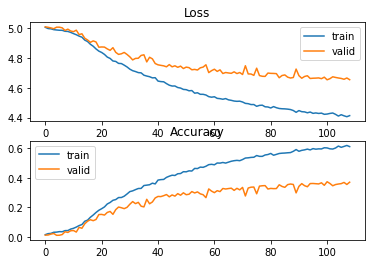

In [12]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()
plt.show()